In [1]:
#https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm/notebook#5.-How-much-value-do-we-put-at-risk-by-investing-in-a-particular-stock?v

# Libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style='whitegrid')

2. Load Data
Load stock market CSV files for the companies.

In [2]:
# Load CSV files for each company
google = pd.read_csv('google_stock_data.csv')
meta = pd.read_csv('meta_stock_data.csv')
apple = pd.read_csv('aapl_stock_data.csv')
nvidia = pd.read_csv('nvda_stock_data.csv')

google['Date'] = pd.to_datetime(google['Date'])
meta['Date'] = pd.to_datetime(meta['Date'])
apple['Date'] = pd.to_datetime(apple['Date'])
nvidia['Date'] = pd.to_datetime(nvidia['Date'])
# Preview each dataset
print("Google Data:\n", google.head())
print("Meta Data:\n", meta.head())
print("Apple Data:\n", apple.head())
print("NVIDIA Data:\n", nvidia.head())

Google Data:
         Date        Open        High         Low       Close   Adj Close  \
0 2021-11-01  148.046005  148.046005  143.225494  143.496994  143.142563   
1 2021-11-02  144.579498  146.608994  144.335495  145.432495  145.073273   
2 2021-11-03  145.900497  146.669006  144.591003  146.598007  146.235901   
3 2021-11-04  147.124496  149.733505  146.307999  148.267502  147.901276   
4 2021-11-05  149.169495  150.327499  148.197006  148.852005  148.484344   

     Volume  
0  46924000  
1  33482000  
2  27494000  
3  38412000  
4  38354000  
Meta Data:
         Date        Open        High         Low       Close   Adj Close  \
0 2021-11-01  326.040009  333.450012  326.000000  329.980011  328.989471   
1 2021-11-02  331.380005  334.790009  323.799988  328.079987  327.095154   
2 2021-11-03  327.489990  332.149994  323.200012  331.619995  330.624542   
3 2021-11-04  334.010010  337.269989  332.649994  335.850006  334.841858   
4 2021-11-05  340.309998  346.790009  339.640015  341

3. Data Overview
Examine the structure of the data.

In [3]:

# Shape of datasets
print("Google Shape:", google.shape)
print("Meta Shape:", meta.shape)
print("Apple Shape:", apple.shape)
print("NVIDIA Shape:", nvidia.shape)

# Column names
print("Google Columns:", google.columns)
print("Meta Columns:", meta.columns)
print("Apple Columns:", apple.columns)
print("NVIDIA Columns:", nvidia.columns)

# Data types and null values
for df, name in zip([google, meta, apple, nvidia], ["Google", "Meta", "Apple", "NVIDIA"]):
    print(f"\n{name} Info:")
    print(df.info())
    print(f"\n{name} Null Values:\n", df.isnull().sum())

Google Shape: (753, 7)
Meta Shape: (753, 7)
Apple Shape: (753, 7)
NVIDIA Shape: (753, 7)
Google Columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Meta Columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Apple Columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
NVIDIA Columns: Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

Google Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 753 entries, 0 to 752
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       753 non-null    datetime64[ns]
 1   Open       753 non-null    float64       
 2   High       753 non-null    float64       
 3   Low        753 non-null    float64       
 4   Close      753 non-null    float64       
 5   Adj Close  753 non-null    float64       
 6   Vol

4. Descriptive Statistics
Get a summary of numeric columns.

In [4]:

# Descriptive statistics for each dataset
for df, name in zip([google, meta, apple, nvidia], ["Google", "Meta", "Apple", "NVIDIA"]):
    print(f"\n{name} Descriptive Statistics:")
    print(df.describe())


Google Descriptive Statistics:
             Open        High         Low       Close   Adj Close  \
count  753.000000  753.000000  753.000000  753.000000  753.000000   
mean   130.525790  132.069066  129.078235  130.569693  130.283128   
std     24.973000   24.985510   24.851048   24.905997   24.897589   
min     85.400002   86.519997   83.339996   83.430000   83.223930   
25%    110.000000  112.147499  108.129997  110.339996  110.067451   
50%    131.488007  133.000000  129.880005  131.529999  131.205109   
75%    146.500000  147.535507  145.227493  146.302002  145.940628   
max    190.309998  191.750000  189.029999  191.179993  190.926636   

             Volume  
count  7.530000e+02  
mean   3.156149e+07  
std    1.280868e+07  
min    9.701400e+06  
25%    2.334720e+07  
50%    2.836200e+07  
75%    3.644600e+07  
max    1.232000e+08  

Meta Descriptive Statistics:
             Open        High         Low       Close   Adj Close  \
count  753.000000  753.000000  753.000000  753.00

5. Data Cleaning
Handle missing or incorrect data.

In [5]:
# Fill missing values (if any) with forward fill
for df in [google, meta, apple, nvidia]:
    df.fillna(method='ffill', inplace=True)

# Ensure no missing values remain
for df, name in zip([google, meta, apple, nvidia], ["Google", "Meta", "Apple", "NVIDIA"]):
    print(f"{name} Missing Values After Cleaning:\n", df.isnull().sum())

Google Missing Values After Cleaning:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Meta Missing Values After Cleaning:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Apple Missing Values After Cleaning:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
NVIDIA Missing Values After Cleaning:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


6. Visualizations
a. Time Series Plot
Visualize stock prices over time.

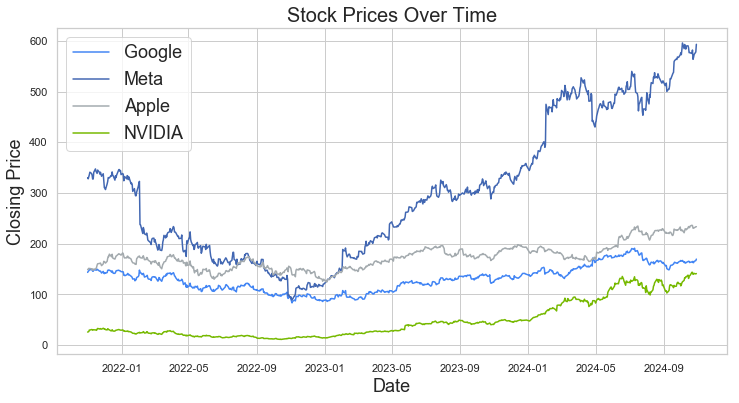

In [6]:
plt.figure(figsize=(12, 6))
for df, label, col in zip([google, meta, apple, nvidia], ["Google", "Meta", "Apple", "NVIDIA"], ["#4285F4","#4267B2","#A3AAAE","#76B900"]):
    plt.plot(pd.to_datetime(df['Date']), df['Close'], label=label, color = col)

plt.title('Stock Prices Over Time', fontsize = 20)
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Closing Price', fontsize = 18)
plt.legend(fontsize = 18)
plt.show()

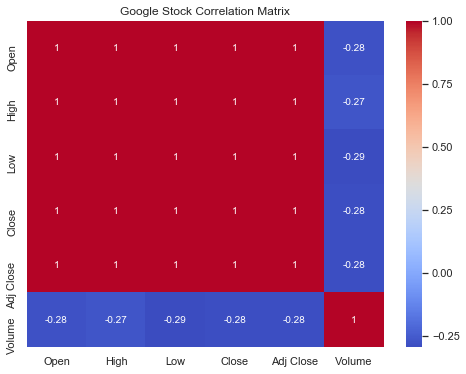

In [7]:
# Correlation for Google
google_corr = google.corr()

# Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(google_corr, annot=True, cmap='coolwarm')
plt.title('Google Stock Correlation Matrix')
plt.show()

# Volume of sales

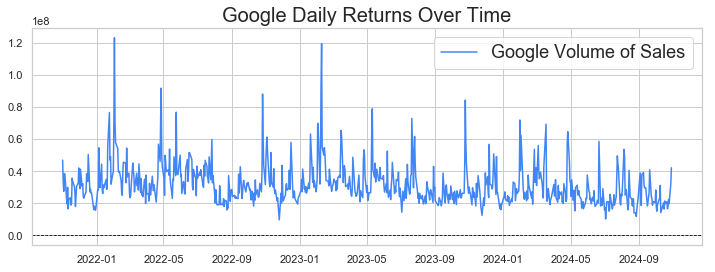

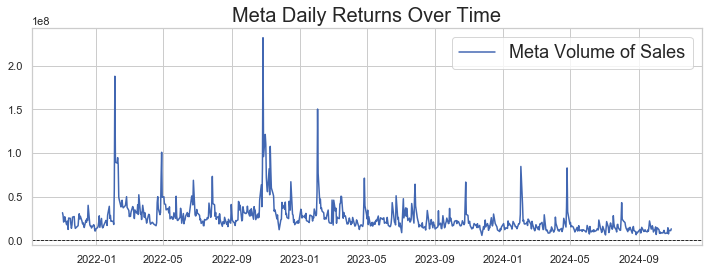

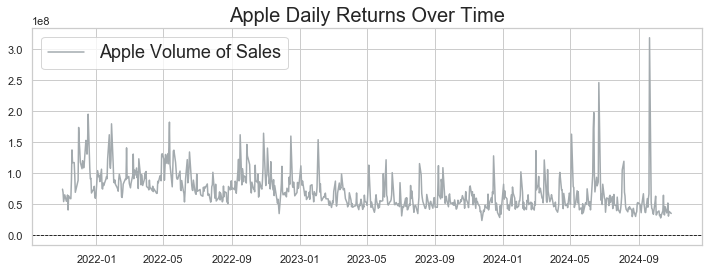

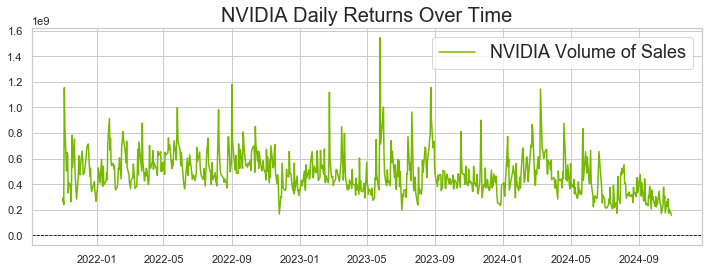

In [8]:
# Add daily returns for each dataset
for df, name, col in zip([google, meta, apple, nvidia], ["Google", "Meta", "Apple", "NVIDIA"], ["#4285F4","#4267B2","#A3AAAE","#76B900"]):
   
    plt.figure(figsize=(12, 4))
    plt.plot(pd.to_datetime(df['Date']), df['Volume'], label=f'{name} Volume of Sales', color=  col)
    plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
    plt.title(f'{name} Daily Returns Over Time', fontsize = 20)
    plt.legend(fontsize = 18)
    plt.show()

c. Daily Returns
Calculate and plot daily percentage returns.

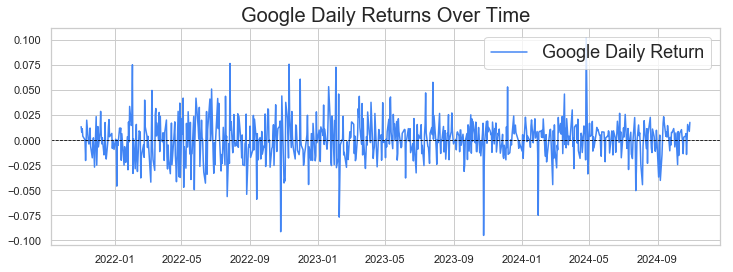

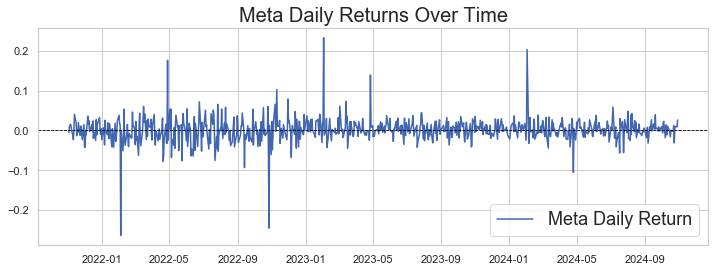

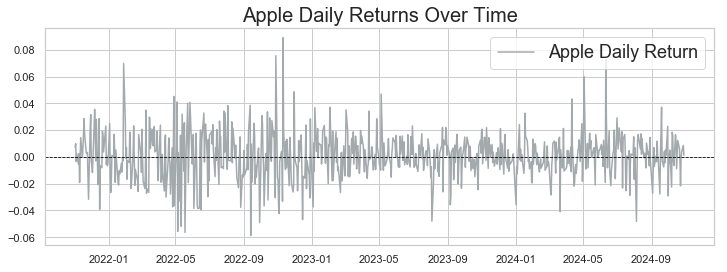

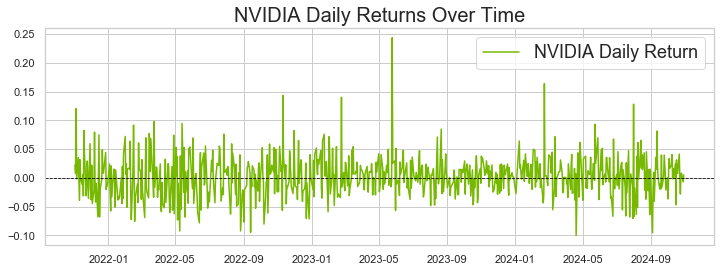

In [9]:
# Add daily returns for each dataset
for df, name, col in zip([google, meta, apple, nvidia], ["Google", "Meta", "Apple", "NVIDIA"], ["#4285F4","#4267B2","#A3AAAE","#76B900"] ):
    df['daily_return'] = df['Close'].pct_change()
    plt.figure(figsize=(12, 4))
    plt.plot(pd.to_datetime(df['Date']), df['daily_return'], label=f'{name} Daily Return', color = col)
    plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
    plt.title(f'{name} Daily Returns Over Time', fontsize =20)
    plt.legend(fontsize = 18)
    plt.show()

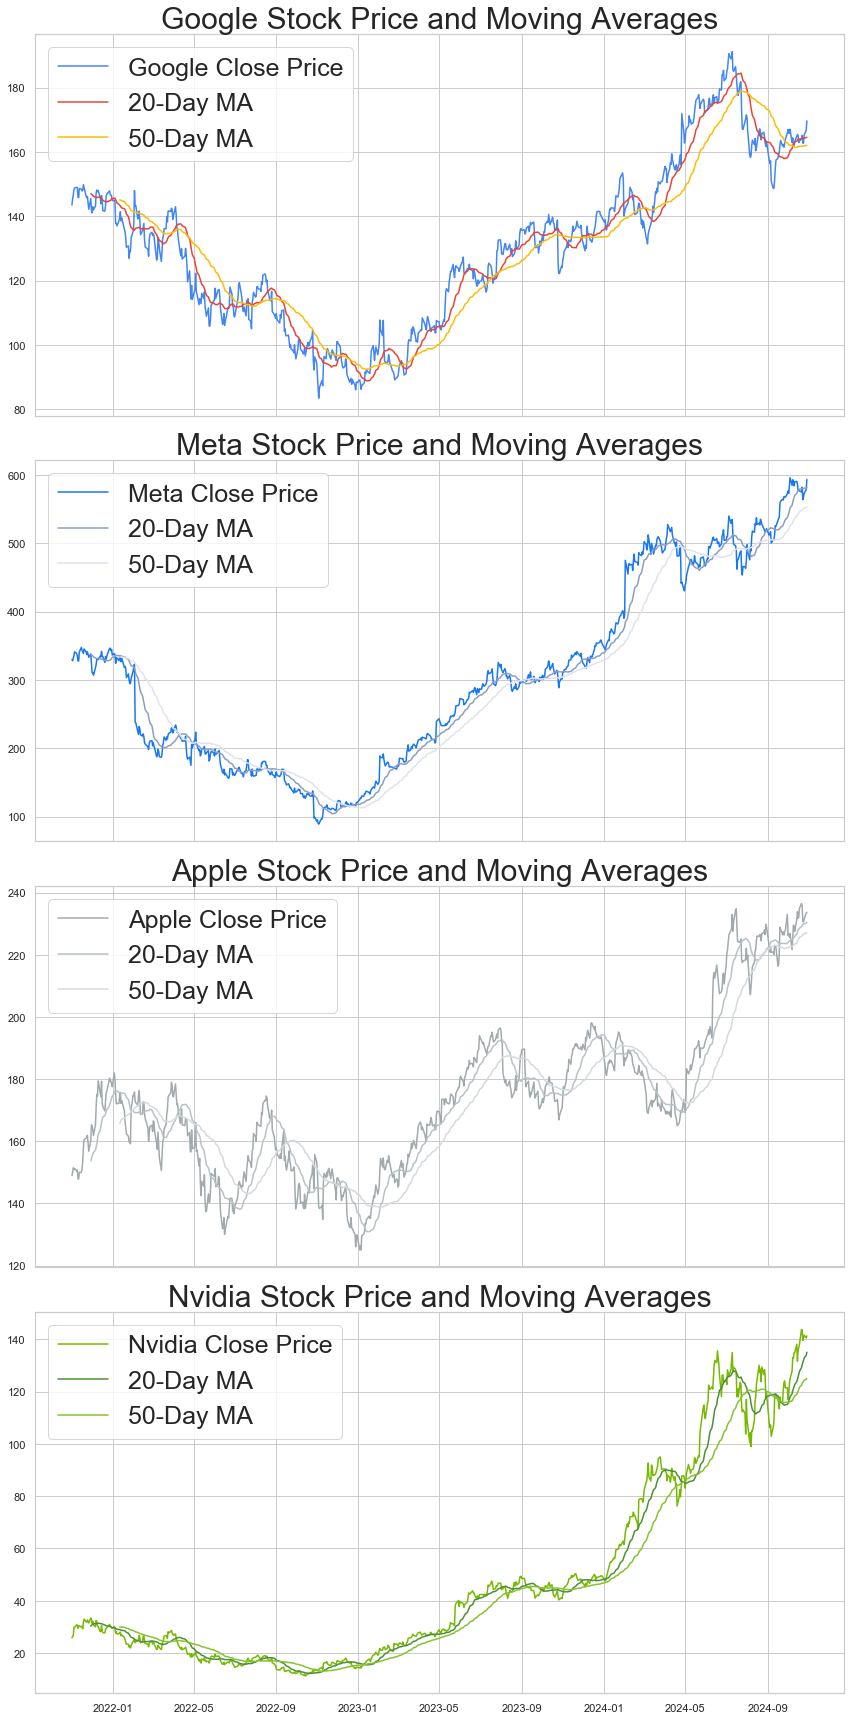

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming data for each company is in DataFrames: google, meta, apple, nvidia
companies = {
    'Google': google,
    'Meta': meta,
    'Apple': apple,
    'Nvidia': nvidia
}

# Colors inspired by each company's logo
colors = {
    'Google': ['#4285F4', '#EA4335', '#FBBC05', '#34A853'],  # Google logo colors
    'Meta': ['#1877F2', '#8B9DC3', '#DFE3EE', '#F7F7F7'],    # Meta (Facebook) blue shades
    'Apple': ['#A2AAAD', '#B8C1C5', '#D4D9DD', '#F5F5F7'],   # Apple gray tones
    'Nvidia': ['#76B900', '#4A8F35', '#85C22D', '#A1D75A']   # Nvidia green shades
}

# Add moving averages (20-day and 50-day)
for name, df in companies.items():
    df['20_day_ma'] = df['Close'].rolling(window=20).mean()
    df['50_day_ma'] = df['Close'].rolling(window=50).mean()

# Plot stock prices and moving averages for all companies
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(12, 24), sharex=True)

for ax, (name, df) in zip(axes, companies.items()):
    ax.plot(pd.to_datetime(df['Date']), df['Close'], label=f'{name} Close Price', color=colors[name][0])
    ax.plot(pd.to_datetime(df['Date']), df['20_day_ma'], label='20-Day MA', color=colors[name][1])
    ax.plot(pd.to_datetime(df['Date']), df['50_day_ma'], label='50-Day MA', color=colors[name][2])
    ax.set_title(f'{name} Stock Price and Moving Averages', fontsize = 30)
    ax.legend(fontsize = 25)

plt.tight_layout()
plt.show()


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Assuming you have 'Date' and 'Close' columns for each company's data
# We will use a sample data structure for Google, Meta, Apple, and NVIDIA.

companies = ['Google', 'Meta', 'Apple', 'NVIDIA']

# Assuming data is already loaded in DataFrames: google, meta, apple, nvidia
# For each company, let's perform the decomposition

fig, axes = plt.subplots(len(companies), 4, figsize=(16, 12))

for i, company in enumerate(companies):
    # Replace with the actual data for each company (google, meta, etc.)
    df = globals()[company.lower()]  # Accessing the DataFrame dynamically (e.g., google, meta, etc.)
    
    # Ensure 'Date' is a datetime object and set as index
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    
    # Decompose using STL with seasonal period set to 252 (for daily data, assuming yearly seasonality)
    stl = STL(df['Close'], period=252)
    result = stl.fit()
    
    # Plot the components: Trend, Seasonal, and Residual
    axes[i, 0].plot(result.trend, label='Trend', color='b')
    axes[i, 0].set_title(f'{company} Trend')
    axes[i, 0].legend()
    
    axes[i, 1].plot(result.seasonal, label='Seasonal', color='g')
    axes[i, 1].set_title(f'{company} Seasonal')
    axes[i, 1].legend()
    
    axes[i, 2].plot(result.resid, label='Residual', color='r')
    axes[i, 2].set_title(f'{company} Residual')
    axes[i, 2].legend()

    # Plot the original series for comparison
    axes[i, 3].plot(df['Close'], label='Original', color='k')
    axes[i, 3].set_title(f'{company} Original Series')
    axes[i, 3].legend()

plt.tight_layout()
plt.show()


ImportError: cannot import name 'STL'

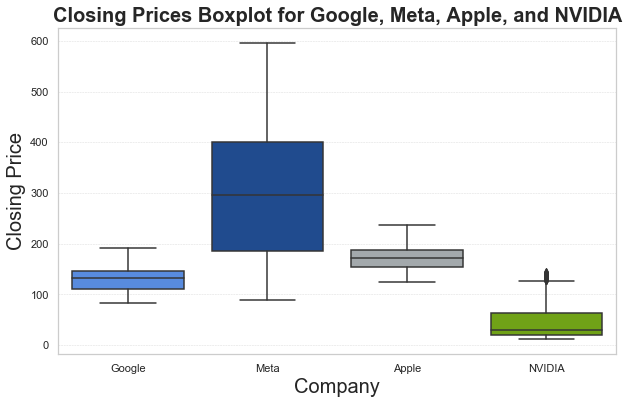

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine 'Close' prices from all datasets into a single DataFrame
combined_data = pd.DataFrame({
    'Google': google['Close'],
    'Meta': meta['Close'],
    'Apple': apple['Close'],
    'NVIDIA': nvidia['Close']
})

# Melt the data for Seaborn compatibility
melted_data = combined_data.reset_index().melt(id_vars=['index'], 
                                               var_name='Company', 
                                               value_name='Close Price')

# Company-specific colors with Meta's color darkened
company_colors = {
    'Google': '#4285F4',  # Blue from Google logo
    'Meta': '#0D47A1',    # Darker blue for Meta
    'Apple': '#A2AAAD',   # Apple gray
    'NVIDIA': '#76B900'   # Nvidia green
}

# Map company names to their respective colors
palette = [company_colors[company] for company in melted_data['Company'].unique()]

# Boxplot for all companies
plt.figure(figsize=(10, 6))
sns.boxplot(data=melted_data, x='Company', y='Close Price', palette=palette)
plt.title('Closing Prices Boxplot for Google, Meta, Apple, and NVIDIA', fontsize=20, fontweight='bold')
plt.ylabel('Closing Price', fontsize=20)
plt.xlabel('Company', fontsize=20)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)  # Add light gridlines for readability
plt.show()



Step 2: Outlier Removal
Outliers can be removed using the Interquartile Range (IQR) method. Here's the code:

In [12]:
def remove_outliers(df, column):
    """
    Removes outliers from a specified column in the DataFrame using the IQR method.
    """
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1  # Interquartile range

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data within bounds
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

# Apply outlier removal to each company's Close prices
google_cleaned = remove_outliers(google, 'Close')
meta_cleaned = remove_outliers(meta, 'Close')
apple_cleaned = remove_outliers(apple, 'Close')
nvidia_cleaned = remove_outliers(nvidia, 'Close')

# Check the shapes before and after
print(f"Google: {google.shape[0]} -> {google_cleaned.shape[0]} rows after outlier removal")
print(f"Meta: {meta.shape[0]} -> {meta_cleaned.shape[0]} rows after outlier removal")
print(f"Apple: {apple.shape[0]} -> {apple_cleaned.shape[0]} rows after outlier removal")
print(f"NVIDIA: {nvidia.shape[0]} -> {nvidia_cleaned.shape[0]} rows after outlier removal")

Google: 753 -> 753 rows after outlier removal
Meta: 753 -> 753 rows after outlier removal
Apple: 753 -> 753 rows after outlier removal
NVIDIA: 753 -> 721 rows after outlier removal


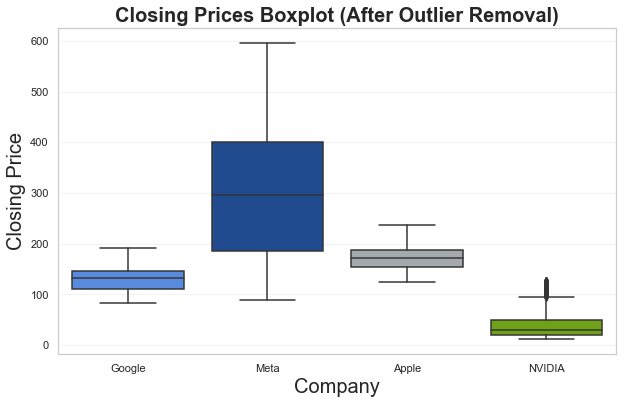

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Combine cleaned 'Close' prices into a single DataFrame
cleaned_combined_data = pd.DataFrame({
    'Google': google_cleaned['Close'],
    'Meta': meta_cleaned['Close'],
    'Apple': apple_cleaned['Close'],
    'NVIDIA': nvidia_cleaned['Close']
})

# Melt the data for Seaborn compatibility
cleaned_melted_data = cleaned_combined_data.reset_index().melt(id_vars=['index'], 
                                                               var_name='Company', 
                                                               value_name='Close Price')

# Company-specific colors with Meta's color darkened
company_colors = {
    'Google': '#4285F4',  # Blue from Google logo
    'Meta': '#0D47A1',    # Darker blue for Meta
    'Apple': '#A2AAAD',   # Apple gray
    'NVIDIA': '#76B900'   # Nvidia green
}

# Map company names to their respective colors
palette = [company_colors[company] for company in cleaned_melted_data['Company'].unique()]

# Boxplot for cleaned data
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned_melted_data, x='Company', y='Close Price', palette=palette)
plt.title('Closing Prices Boxplot (After Outlier Removal)', fontsize=20, fontweight='bold')
plt.ylabel('Closing Price', fontsize=20)
plt.xlabel('Company', fontsize=20)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)  # Add light gridlines for readability
plt.show()


In [14]:
# Save cleaned datasets
google_cleaned.to_csv('google_stock_cleaned.csv', index=False)
meta_cleaned.to_csv('meta_stock_cleaned.csv', index=False)
apple_cleaned.to_csv('apple_stock_cleaned.csv', index=False)
nvidia_cleaned.to_csv('nvidia_stock_cleaned.csv', index=False)

print("Cleaned data saved!")

Cleaned data saved!
